In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('./mount')

Mounted at ./mount


In [3]:
class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1.0

        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0

        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28,28)
        plt.title('label = '+str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass

In [4]:
mnist_data = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_train.csv')

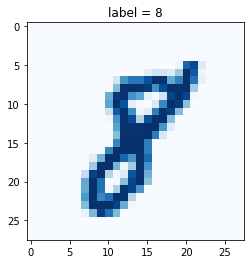

In [ ]:
mnist_data.plot_image(17)

In [5]:
def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data

def generate_random_seed(size):
    random_data = torch.randn(size) # normal distribution
    return random_data

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784,200),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),

            nn.Linear(200,1),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)

        self.counter = 0
        self.progress = []
        
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)

        self.counter += 1

        if self.counter % 10 == 0:
            self.progress.append(loss.item())
            pass
        
        if self.counter % 1000 == 0:
            print("counter = ", self.counter)
            pass
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0,0.25,0.5))
        pass

In [ ]:
D = Discriminator()

for label, image_data_tensor, target_tensor in mnist_data:
    # train real data
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    # train fake data
    D.train(generate_random(784), torch.FloatTensor([0.0]))

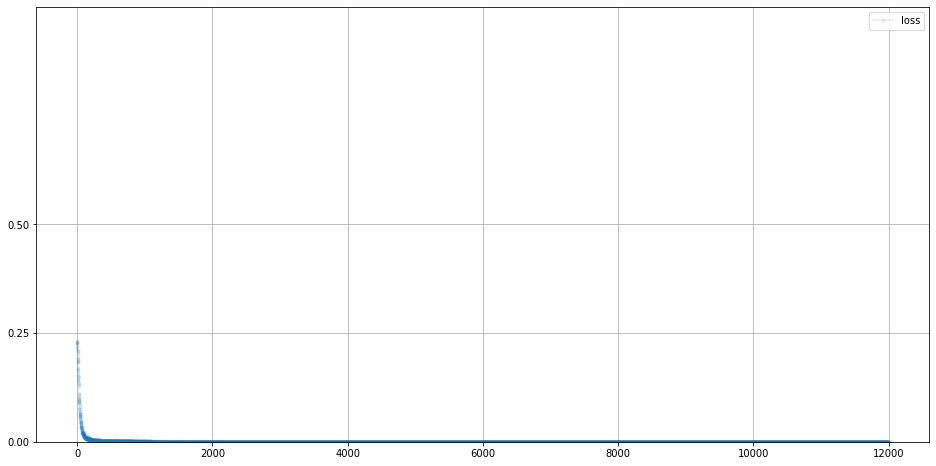

In [ ]:
D.plot_progress()

In [ ]:
for i in range(4):
    image_data_tensor = mnist_data[random.randint(0,60000)][1]
    print(D.forward(image_data_tensor).item())

for i in range(4):
    print(D.forward(generate_random(784)).item())

0.9978594183921814
0.9960380792617798
0.9969007968902588
0.9954715967178345
0.0059078894555568695
0.005318041425198317
0.005078261252492666
0.005480106454342604


In [7]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(100,200),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),

            nn.Linear(200,784),
            nn.Sigmoid()
        )

        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)

        self.counter = 0
        self.progress = []
        
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)

        loss = D.loss_function(d_output, targets)

        self.counter += 1

        if self.counter % 10 == 0:
            self.progress.append(loss.item())
            pass
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0,0.25,0.5))
        pass

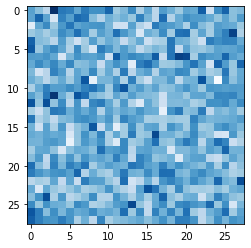

In [ ]:
G = Generator()
output = G.forward(generate_random(1))
img = output.detach().numpy().reshape(28,28)
plt.imshow(img, interpolation='none', cmap='Blues')

In [8]:
D = Discriminator()
G = Generator()

for i in range(4):
    print('=====epoch {}====='.format(i+1))
    for label, image_data_tensor, target_tensor in mnist_data:
        D.train(image_data_tensor, torch.FloatTensor([1.0]))

        D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]))

        G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))

=====epoch 1=====
counter =  1000
counter =  2000
counter =  3000
counter =  4000
counter =  5000
counter =  6000
counter =  7000
counter =  8000
counter =  9000
counter =  10000
counter =  11000
counter =  12000
counter =  13000
counter =  14000
counter =  15000
counter =  16000
counter =  17000
counter =  18000
counter =  19000
counter =  20000
counter =  21000
counter =  22000
counter =  23000
counter =  24000
counter =  25000
counter =  26000
counter =  27000
counter =  28000
counter =  29000
counter =  30000
counter =  31000
counter =  32000
counter =  33000
counter =  34000
counter =  35000
counter =  36000
counter =  37000
counter =  38000
counter =  39000
counter =  40000
counter =  41000
counter =  42000
counter =  43000
counter =  44000
counter =  45000
counter =  46000
counter =  47000
counter =  48000
counter =  49000
counter =  50000
counter =  51000
counter =  52000
counter =  53000
counter =  54000
counter =  55000
counter =  56000
counter =  57000
counter =  58000
count

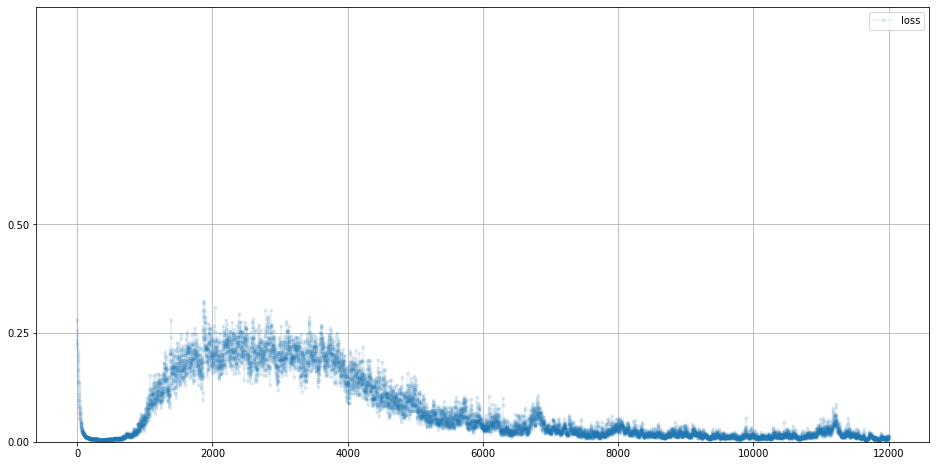

In [ ]:
D.plot_progress()

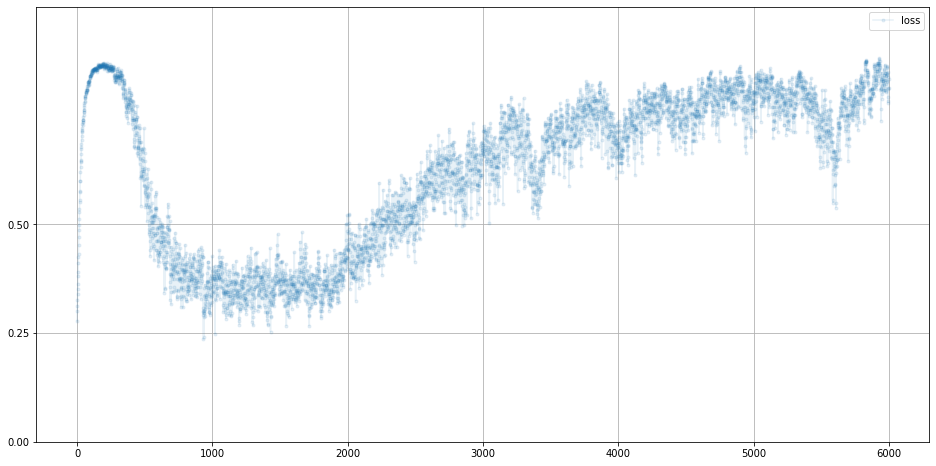

In [ ]:
G.plot_progress()

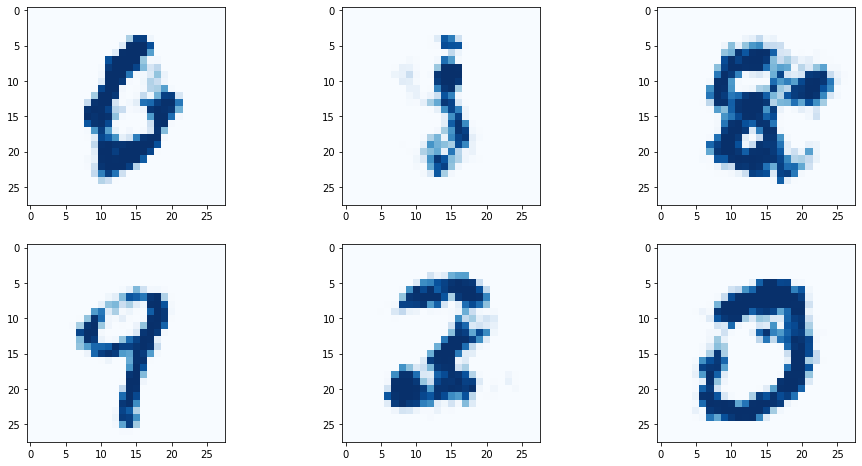

In [9]:
f, axarr = plt.subplots(2,3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')

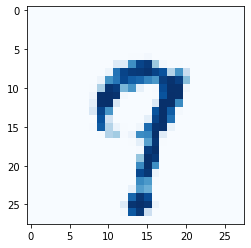

In [11]:
seed1 = generate_random_seed(100)
out1 = G.forward(seed1)
img1 = out1.detach().numpy().reshape(28,28)
plt.imshow(img1, interpolation='none', cmap='Blues')

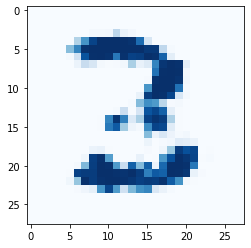

In [12]:
seed2 = generate_random_seed(100)
out2 = G.forward(seed2)
img2 = out2.detach().numpy().reshape(28,28)
plt.imshow(img2, interpolation='none', cmap='Blues')